# Ch4. Web scraping
## 4.1 상장법인 목록
한국거래소 기업공시채널 kind.krx.co.kr, 상장법인상세정보 -> 상장법인목폭 -> excel
### 4.1.1 excel 파일
상장법인목록.xls : HTML , read_excel()로 읽어오지 못한다. read_html()로 읽어야 한다.\
.xlsx 변경, 파일 open 후 xlsx로 저장. read_excel()로 읽어들인다.
### 4.1.2 read_html()
krx_list[0] : excel sheet의 첫 table을 의미한다.

In [24]:
import pandas as pd
krx_list=pd.read_html('./상장법인목록.xls')

#print(type(krx_list))
#print(len(krx_list))  # 몇 개의 표가 있는지 확인
df = krx_list[0]      # 첫 번째 표를 DataFrame으로 추출
print(df.head())      # 데이터 미리보기
print(df.columns)
print(df.index.names)
print(df.shape) #[0] row(). [1] columns
print(type(df))

        회사명 시장구분    종목코드              업종                주요제품         상장일  결산월  \
0      이노테크  코스닥  469610   특수 목적용 기계 제조업      복합 신뢰성 환경시험 장비  2025-11-07  12월   
1        노타  코스닥  486990  소프트웨어 개발 및 공급업  AI 최적화 및 경량화 소프트웨어  2025-11-03  12월   
2      삼익제약  코스닥  014950         의약품 제조업      완제의약품 제조 및 CMO  2025-10-27  12월   
3      명인제약   유가  317450         의약품 제조업  신경정신계열, 구강계열 완제의약품  2025-10-01  12월   
4  KB제33호스팩  코스닥  0072Z0      금융 지원 서비스업              기업인수합병  2025-09-30  12월   

  대표자명                          홈페이지     지역  
0  장석준  http://www.innotech2013.com/   충청남도  
1  채명수           http:///www.nota.ai  대전광역시  
2  이충환        http://www.samik.co.kr  인천광역시  
3  이행명    http://www.myunginph.co.kr    경기도  
4  박성원                           NaN  서울특별시  
Index(['회사명', '시장구분', '종목코드', '업종', '주요제품', '상장일', '결산월', '대표자명', '홈페이지',
       '지역'],
      dtype='object')
[None]
(2763, 10)
<class 'pandas.core.frame.DataFrame'>


In [25]:
krx_list[0]  

,회사명,시장구분,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,이노테크,코스닥,469610,특수 목적용 기계 제조업,복합 신뢰성 환경시험 장비,2025-11-07,12월,장석준,http://www.innotech2013.com/,충청남도
1,노타,코스닥,486990,소프트웨어 개발 및 공급업,AI 최적화 및 경량화 소프트웨어,2025-11-03,12월,채명수,http:///www.nota.ai,대전광역시
2,삼익제약,코스닥,014950,의약품 제조업,완제의약품 제조 및 CMO,2025-10-27,12월,이충환,http://www.samik.co.kr,인천광역시
3,명인제약,유가,317450,의약품 제조업,"신경정신계열, 구강계열 완제의약품",2025-10-01,12월,이행명,http://www.myunginph.co.kr,경기도
4,KB제33호스팩,코스닥,0072Z0,금융 지원 서비스업,기업인수합병,2025-09-30,12월,박성원,NaN,서울특별시
...,...,...,...,...,...,...,...,...,...,...
2758,유한양행,유가,000100,의약품 제조업,"의약품(삐콤씨, 안티푸라민, 렉라자, 로수바미브, 코푸시럽 등), 생활용품(유한락스...",1962-11-01,12월,대표이사 조욱제,http://www.yuhan.co.kr,서울특별시
2759,CJ대한통운,유가,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,"신영수, 민영학 (각자 대표)",http://www.cjlogistics.com,서울특별시
2760,경방,유가,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2761,유수홀딩스,유가,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [26]:
krx_list[0].종목코드=krx_list[0].종목코드.map('{:06d}'.format)
krx_list[0]

ValueError: Unknown format code 'd' for object of type 'str'

In [27]:
import pandas as pd

krx_list = pd.read_html('./상장법인목록.xls') # KRX 상장법인목록 불러오기
df = krx_list[0].copy()                      # 첫 번째 테이블 선택
df['종목코드'] = df['종목코드'].astype(str).str.zfill(6) # 종목코드를 문자열 6자리로 변환 (예: 5930 → "005930")
df = df.sort_values(by='종목코드', ascending=True)      # 종목코드 기준으로 오름차순 정렬

df

,회사명,시장구분,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2674,동화약품,유가,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,"유준하, 윤인호(각자 대표이사)",http://www.dong-wha.co.kr,서울특별시
2666,KR모터스,유가,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,"정재경, 노성석 (각자 대표이사)",http://www.krmotors.com,경상남도
2760,경방,유가,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2752,삼양홀딩스,유가,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,엄태웅,http://www.samyang.com,서울특별시
1507,하이트진로,유가,000080,알코올음료 제조업,"맥주, 소주",2009-10-19,12월,김인규,http://www.hitejinro.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
875,JTC,코스닥,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,야마모토 후미야,http://www.groupjtc.com/korean/,일본
632,고스트스튜디오,코스닥,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,"손창욱, 최명규 (공동대표)",http://www.ghoststudio.net,홍콩
650,소마젠,코스닥,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,홍수,http://psomagen.com,미국
571,프레스티지바이오파마,유가,950210,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르


In [28]:
import pandas as pd

url = "https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13"
df = pd.read_html(url, header=0, encoding='euc-kr')[0]

df['종목코드'] = df['종목코드'].astype(str).str.zfill(6)
df = df.sort_values(by='종목코드')
print(df.head())


C:\Users\ppjm7\AppData\Local\Programs\Python\Python312\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


        회사명 시장구분    종목코드              업종  \
2674   동화약품   유가  000020         의약품 제조업   
2666  KR모터스   유가  000040  그외 기타 운송장비 제조업   
2760     경방   유가  000050          종합 소매업   
2752  삼양홀딩스   유가  000070          기타 금융업   
1507  하이트진로   유가  000080       알코올음료 제조업   

                                           주요제품         상장일  결산월  \
2674                              의약품 제조,판매,수출입  1976-03-24  12월   
2666                            이륜차(오토바이) 제조,도매  1976-05-25  12월   
2760  섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입  1956-03-03  12월   
2752                               지주회사,경영자문컨설팅  1968-12-27  12월   
1507                                     맥주, 소주  2009-10-19  12월   

                    대표자명                        홈페이지     지역  
2674   유준하, 윤인호(각자 대표이사)   http://www.dong-wha.co.kr  서울특별시  
2666  정재경, 노성석 (각자 대표이사)     http://www.krmotors.com   경상남도  
2760              김준, 김담  http://www.kyungbang.co.kr  서울특별시  
2752                 엄태웅      http://www.samyang.com  서울특별시  
1507            

이 경고는 사실 코드가 잘못된 건 아니고,
pandas 내부에서 HTML을 읽을 때 사용하는 BeautifulSoup이
“이미 유니코드(UTF-8)로 변환된 문자열인데, 또 인코딩을 지정했네?” 하고 알려주는 단순 경고예요.

In [2]:
import pandas as pd
import requests
from io import StringIO 

url = "https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13"
response = requests.get(url)
response.encoding = 'euc-kr'  # 한글 페이지 인코딩 지정

df = pd.read_html(StringIO(response.text), header=0)[0] # StringIO로 문자열을 감싸기
df['종목코드'] = df['종목코드'].astype(str).str.zfill(6)
df = df.sort_values(by='종목코드', ascending=True)

df

,회사명,시장구분,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2676,동화약품,유가,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,"유준하, 윤인호(각자 대표이사)",http://www.dong-wha.co.kr,서울특별시
2668,KR모터스,유가,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,"정재경, 노성석 (각자 대표이사)",http://www.krmotors.com,경상남도
2762,경방,유가,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2754,삼양홀딩스,유가,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,엄태웅,http://www.samyang.com,서울특별시
1509,하이트진로,유가,000080,알코올음료 제조업,"맥주, 소주",2009-10-19,12월,김인규,http://www.hitejinro.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
877,JTC,코스닥,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,야마모토 후미야,http://www.groupjtc.com/korean/,일본
634,고스트스튜디오,코스닥,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,"손창욱, 최명규 (공동대표)",http://www.ghoststudio.net,홍콩
652,소마젠,코스닥,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,홍수,http://psomagen.com,미국
573,프레스티지바이오파마,유가,950210,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르


In [16]:
import pandas as pd
import requests
from io import StringIO 
"""KRX로부터 상장기업 목록 파일을 읽어와서 데이터프레임으로 반환"""
url = "https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13"
response = requests.get(url)
krx = pd.read_html(StringIO(response.text), header=0)[0] # StringIO로 문자열을 감싸기
krx = krx[['종목코드', '회사명']]
krx = krx.rename(columns={'종목코드': 'code', '회사명': 'company'})
krx['code'] = krx['code'].astype(str).str.zfill(6)
print(krx)

        code   company
0     0015G0      그린광학
1     459550        알트
2     061090   세나테크놀로지
3     494120     큐리오시스
4     469610      이노테크
...      ...       ...
2760  000100      유한양행
2761  000120    CJ대한통운
2762  000050        경방
2763  000700     유수홀딩스
2764  003480  한진중공업홀딩스

[2765 rows x 2 columns]


## 4.2 HTML
web page: JSP, ASP, PHP 다양한 언어로 작성\
web browser에서는 최종적으로 HTML로 변환된 결과를 렌더링해서 표시
### 4.2.1 HTML 구조
HTML hyperText Markup Language, hypertext: 다른 문서를 연결하는 텍스트를 의미\
Markup 텍스트가 화면에서 어떻게 보여야 하는지 정의하는 기법 -> Tag
### 4.2.2 주요 태그
태그는 속성(attribute)라는 추가 정보를 지닐 수 있다. 하이퍼링크를 정의하는 <a> 태그는 링크 목적지를 나타내는 href 속성을 가진다.
HtmlSample.htm 파일로 저장한 후 Web browser로 열어 보자.


In [30]:
# only bring dataframe
import pandas as pd

df = pd.read_html('./HtmlSample.htm')
print(df)
df=df[0]
print(df)
#print(df.head())      # 데이터 미리보기
#print(df.columns)
#print(df.index.names)
#print(df.shape) #[0] row(). [1] columns
print(type(df))

[  table header 1 table header 2 table header 3
0   table data 4   table data 5   table data 6
1   table data 7   table data 8   table data 9]
  table header 1 table header 2 table header 3
0   table data 4   table data 5   table data 6
1   table data 7   table data 8   table data 9
<class 'pandas.core.frame.DataFrame'>


## 4.3 Web에서 일별 시세 구하기
Web browser의 주소창: https://finance.naver.com/item/fchart.naver?code=068270
### 4.3.1 Naver 금융일별 시세 분석하기
셀트리온 일별 시세 데이버 전부가져오자.
일별시세 / 오른 Click / 프레임소스보기 / URL 주소-종목코드-페이지 숫자를 파라미터로 넘겨주면, 해당 종목 일별 시세에서 지정한 페이지로 접속한다.
### 4.3.2 소스코드에서 링크 주소 접속하기
일별시세 1page / 프레임소스보기 / 마지막 table / 맨뒤 page 확인 502 \
Web page로부터 HTML 소스코드를 읽어와 맨 뒤 페이지가 실제로 몇 페이지인지 알아내는 과정을 진행해 보자(butifulsoup, web scraping python libaray)

## 4.4 Beautiful Soup 일별시세 읽어오기
BeautifulSoup HTML, XML 페이지로부터 데이터를 추출하는 파이썬라이브러리\
Web crawler, web scraper, scraper: crawing해서 모은 data에서 원하는 정보를 추출한다는 의미
### 4.4.3 맨 뒤 페이지 숫자 구하기

In [31]:
# ch04_01_Celltrion_PlotChart.py
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]  # ①
df = df.sort_values(by='날짜')  # ②

# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)  # ③
plt.plot(df['날짜'], df['종가'], 'co-')  # ④
plt.grid(color='gray', linestyle='--')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'append'

In [1]:
from bs4 import BeautifulSoup
import requests

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
print(pgrr.a['href'])

/item/sise_day.naver?code=068270&page=503


In [2]:
print(pgrr.prettify())

<td class="pgRR">
 <a href="/item/sise_day.naver?code=068270&amp;page=503">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>



In [3]:
print(pgrr.text)


맨뒤
				




In [4]:
s = str(pgrr.a['href']).split('=')
print(s)
last_page=s[-1]
print(last_page)

['/item/sise_day.naver?code', '068270&page', '503']
503


### 4.4.4 전체 페이지 읽어오기

이전 coding은 어려 문제가 있음. pandas version 문제\
append - concat 사용\
html.read - io 사용


In [46]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io # io 모듈 추가

# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '068270'
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'


# 1. 맨 뒤 페이지 숫자 구하기 (이전 답변에서 수정된 로직 사용)
url_first = f'{sise_url_base}&page=1'
try:
    html = requests.get(url_first, headers=headers).text
    bs = BeautifulSoup(html, 'lxml')
    pgrr = bs.find('td', class_='pgRR')
    
    if pgrr and pgrr.a and 'href' in pgrr.a.attrs:
        last_page = int(str(pgrr.a['href']).split('=')[-1])
    else:
        last_page = 1
    
    print(f"✅ 총 크롤링할 페이지 수: {last_page} 페이지")
except:
    last_page = 1

# 2. 전체 페이지 읽어오기
all_pages_data = [] # 각 페이지의 DataFrame을 담을 리스트

for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    
    try:
        html = requests.get(url, headers=headers).text
        
        # 🌟 경고 해결을 위한 수정 부분: StringIO 객체로 HTML 문자열 감싸기 🌟
        html_io = io.StringIO(html)
        page_df = pd.read_html(html_io, header=0)[0] 
        
        # DataFrame을 리스트에 추가
        all_pages_data.append(page_df) 
        
    except Exception as e:
        print(f"❌ {page} 페이지 크롤링 중 오류 발생: {e}")
        break 


# 3. 모든 DataFrame을 한 번에 합치고, 빈 행 제거
df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()

print("\n--- 크롤링 완료 데이터 ---")
print(df)

✅ 총 크롤링할 페이지 수: 502 페이지

--- 크롤링 완료 데이터 ---
              날짜        종가         전일비        시가        고가        저가       거래량
1     2025.11.11  172800.0     하락  800  173800.0  175800.0  172700.0  391585.0
2     2025.11.10  173600.0     상승  700  174000.0  175500.0  173100.0  385613.0
3     2025.11.07  172900.0   하락  1,800  174700.0  174700.0  171100.0  525561.0
4     2025.11.06  174700.0     하락  200  176100.0  178800.0  173800.0  692969.0
5     2025.11.05  174900.0   하락  1,400  180000.0  180000.0  172500.0  992167.0
...          ...       ...         ...       ...       ...       ...       ...
7513  2005.07.25    5650.0      상승  70    5500.0    5950.0    5500.0   61036.0
7516  2005.07.22    5580.0     하락  160    5850.0    5850.0    5530.0   69921.0
7517  2005.07.21    5740.0     하락  810    6450.0    6580.0    5730.0  182685.0
7518  2005.07.20    6550.0  하한가  1,150    7690.0    7690.0    6550.0  422688.0
7519  2005.07.19    7700.0  상한가  2,500    6700.0    7700.0    6510.0  499088.0

[5014 r

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io 

# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '068270' 
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'

# 1. 맨 뒤 페이지 숫자 구하기 (try/except 제거)
url_first = f'{sise_url_base}&page=1'
html = requests.get(url_first, headers=headers).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
last_page = int(str(pgrr.a['href']).split('=')[-1])
print(f"총 크롤링할 페이지 수: {last_page} 페이지")

# 2. 전체 페이지 읽어오기
all_pages_data = [] 
for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    html = requests.get(url, headers=headers).text
    html_io = io.StringIO(html)
    page_df = pd.read_html(html_io, header=0)[0] 
    all_pages_data.append(page_df) 

df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()

#df['날짜'] = pd.to_datetime(df['날짜'])
#df = df.sort_values(by='날짜', ascending=True)
#df.reset_index(drop=True, inplace=True)

print(df)
print(f"\n최종 데이터 행 수: {len(df)}개")

총 크롤링할 페이지 수: 502 페이지
              날짜        종가         전일비        시가        고가        저가  \
1     2025.11.12  182900.0  상승  10,100  174300.0  184300.0  174100.0   
2     2025.11.11  172800.0     하락  800  173800.0  175800.0  172700.0   
3     2025.11.10  173600.0     상승  700  174000.0  175500.0  173100.0   
4     2025.11.07  172900.0   하락  1,800  174700.0  174700.0  171100.0   
5     2025.11.06  174700.0     하락  200  176100.0  178800.0  173800.0   
...          ...       ...         ...       ...       ...       ...   
7516  2005.07.25    5650.0      상승  70    5500.0    5950.0    5500.0   
7517  2005.07.22    5580.0     하락  160    5850.0    5850.0    5530.0   
7518  2005.07.21    5740.0     하락  810    6450.0    6580.0    5730.0   
7519  2005.07.20    6550.0  하한가  1,150    7690.0    7690.0    6550.0   
7520  2005.07.19    7700.0  상한가  2,500    6700.0    7700.0    6510.0   

            거래량  
1     2426134.0  
2      391585.0  
3      385613.0  
4      525561.0  
5      692969.0  
...  

## 4.5 OHLC와 candle chart
OHLC Open High Low Close
### 4.5.1 OHLC chart와 candle chart comparison
### 4.5.2 셀트리온 종가 chart


총 크롤링할 페이지 수: 502 페이지


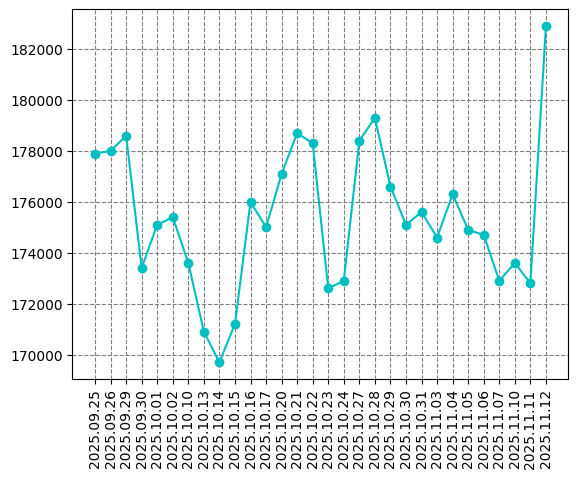

In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io
from matplotlib import pyplot as plt

# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '068270' 
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'

# 1. 맨 뒤 페이지 숫자 구하기 (try/except 제거)
url_first = f'{sise_url_base}&page=1'
html = requests.get(url_first, headers=headers).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
last_page = int(str(pgrr.a['href']).split('=')[-1])
print(f"총 크롤링할 페이지 수: {last_page} 페이지")

# 2. 전체 페이지 읽어오기
all_pages_data = [] 
for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    html = requests.get(url, headers=headers).text
    html_io = io.StringIO(html)
    page_df = pd.read_html(html_io, header=0)[0] 
    all_pages_data.append(page_df) 

df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by="날짜")

plt.plot(df["날짜"], df["종가"], "co-")
plt.xticks(rotation=90)
plt.grid(color="gray", linestyle="--")
plt.show()

### 4.4.3 celltrion candle chart
mpl _finance package\
mplfinance by Daniel Goldfarb 다니엘 골드팝 
pip install mplfinance


✅ Total pages to crawl: 502

🔥 Generating Candlestick Chart...


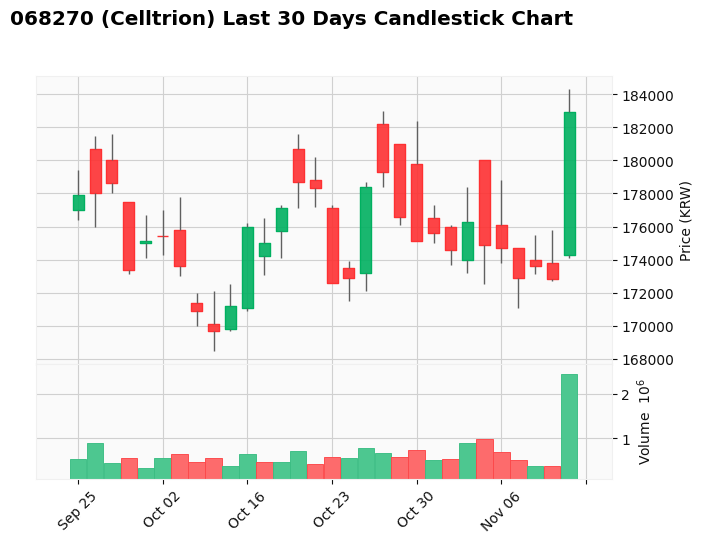

In [26]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io
import mplfinance as mpf 
import matplotlib.pyplot as plt 
import warnings 

# -----------------------------------------------------------------------------------
# ❌ 한글 폰트 설정 및 경고 무시 코드 모두 제거 (요청에 따라 삭제)
# -----------------------------------------------------------------------------------

# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '068270' 
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'

# --- 1. 맨 뒤 페이지 숫자 구하기 ---
url_first = f'{sise_url_base}&page=1'
html = requests.get(url_first, headers=headers).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
last_page = int(str(pgrr.a['href']).split('=')[-1])
print(f"✅ Total pages to crawl: {last_page}") # 출력 메시지도 영어로 변경


# --- 2. 전체 페이지 읽어오기 ---
all_pages_data = [] 
for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    html = requests.get(url, headers=headers).text
    html_io = io.StringIO(html)
    page_df = pd.read_html(html_io, header=0)[0] 
    all_pages_data.append(page_df) 

# --- 3. 데이터 합치기 및 정제 ---
df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()

# --- 4. 캔들 차트 데이터 형식으로 가공 ---
df.columns = ['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']
df['전일비'] = df['전일비'].astype(str).str.replace(r'[가-힣]', '', regex=True).str.strip()

numeric_cols = ['종가', '전일비', '시가', '고가', '저가', '거래량']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float) 

df['날짜'] = pd.to_datetime(df['날짜'])
df = df.set_index('날짜')

df = df[['시가', '고가', '저가', '종가', '거래량']]
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume'] 

df = df.iloc[::-1] 
df_plot = df.tail(30)


# --- 5. mplfinance로 캔들 차트 생성 ---
print("\n🔥 Generating Candlestick Chart...") # 출력 메시지도 영어로 변경

mpf.plot(
    df_plot, 
    type='candle', 
    style='yahoo', 
    volume=True, 
    # 차트 제목과 레이블을 한글이 아닌 영어로 변경하여 폰트 문제를 우회합니다.
    title=f'{code} (Celltrion) Last 30 Days Candlestick Chart', 
    ylabel='Price (KRW)',
    xrotation=45
)


Total pages to crawl: 502
                Open      High       Low     Close    Volume
Date                                                        
2025-09-25  177000.0  179400.0  176400.0  177900.0  540443.0
2025-09-26  180700.0  181500.0  176000.0  178000.0  887114.0
2025-09-29  180000.0  181600.0  178050.0  178600.0  440827.0
2025-09-30  177500.0  177500.0  173100.0  173400.0  565425.0
2025-10-01  175000.0  176700.0  174100.0  175100.0  327878.0


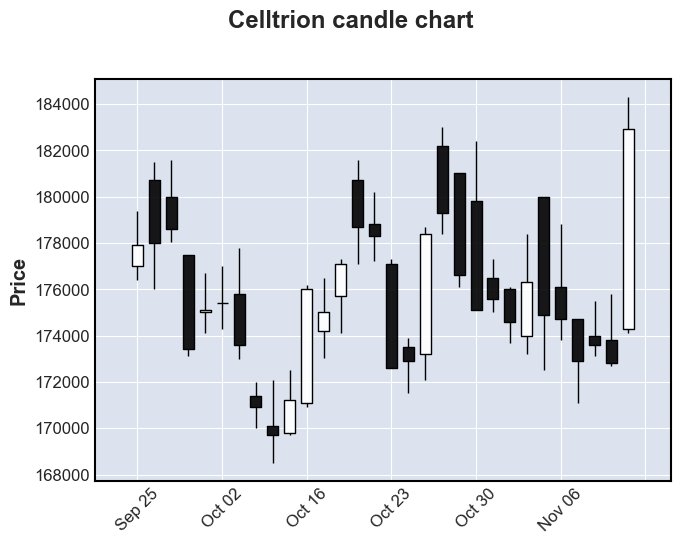

In [21]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io
import mplfinance as mpf 
import matplotlib.pyplot as plt 

# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '068270' 
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'

# --- 1. 맨 뒤 페이지 숫자 구하기 ---
url_first = f'{sise_url_base}&page=1'
html = requests.get(url_first, headers=headers).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
last_page = int(str(pgrr.a['href']).split('=')[-1])
print(f"Total pages to crawl: {last_page}") # 출력 메시지도 영어로 변경

# --- 2. 전체 페이지 읽어오기 ---
all_pages_data = [] 
for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    html = requests.get(url, headers=headers).text
    html_io = io.StringIO(html)
    page_df = pd.read_html(html_io, header=0)[0] 
    all_pages_data.append(page_df) 

# --- 3. 데이터 합치기 및 정제 ---
df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()
df = df.iloc[0:30]

df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by="Date")
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df.head())

mpf.plot(df, title='Celltrion candle chart', type='candle')
#mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')
#kwargs = dict(title='Celltrion customized chart', type='candle',
#    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
#mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
#s  = mpf.make_mpf_style(marketcolors=mc)
#mpf.plot(df, **kwargs, style=s)

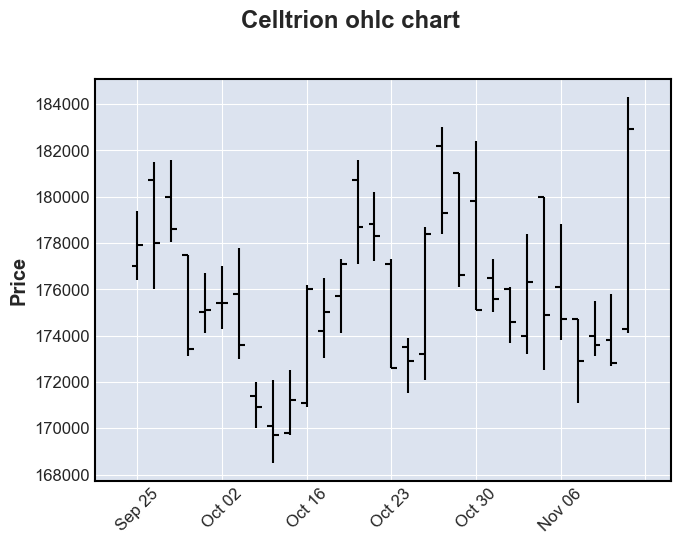

In [23]:
mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')


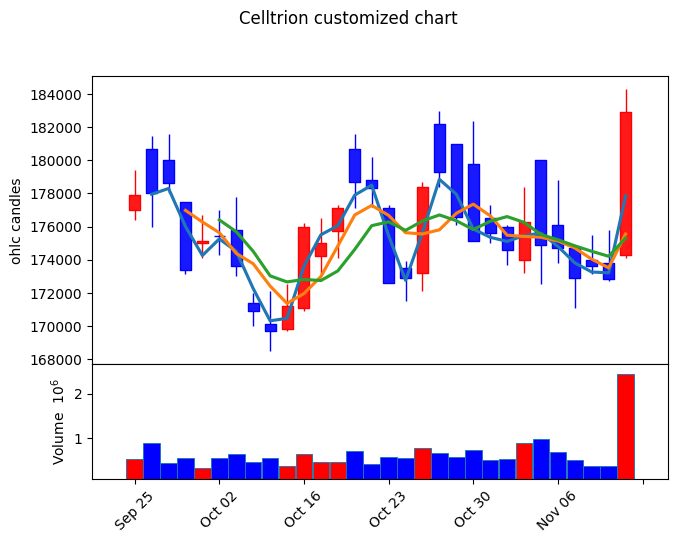

In [24]:
kwargs = dict(title='Celltrion customized chart', type='candle',
    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)

In [8]:
#import pandas as pd
#df=pd.read_excel('./상장법인목록.xls',engine='xlrd')
#df = df[0]
#print(df.head())
import pandas as pd
df=pd.read_html('./상장법인목록.xls')
df = df[0]
print(df.head())

        회사명 시장구분    종목코드              업종                주요제품         상장일  결산월  \
0      이노테크  코스닥  469610   특수 목적용 기계 제조업      복합 신뢰성 환경시험 장비  2025-11-07  12월   
1        노타  코스닥  486990  소프트웨어 개발 및 공급업  AI 최적화 및 경량화 소프트웨어  2025-11-03  12월   
2      삼익제약  코스닥  014950         의약품 제조업      완제의약품 제조 및 CMO  2025-10-27  12월   
3      명인제약   유가  317450         의약품 제조업  신경정신계열, 구강계열 완제의약품  2025-10-01  12월   
4  KB제33호스팩  코스닥  0072Z0      금융 지원 서비스업              기업인수합병  2025-09-30  12월   

  대표자명                          홈페이지     지역  
0  장석준  http://www.innotech2013.com/   충청남도  
1  채명수           http:///www.nota.ai  대전광역시  
2  이충환        http://www.samik.co.kr  인천광역시  
3  이행명    http://www.myunginph.co.kr    경기도  
4  박성원                           NaN  서울특별시  
